## Is sentiment or subjectivity associated with insincerity?

In [1]:
import pandas as pd
import numpy as np
import os
from textblob import TextBlob
import matplotlib as plt
import seaborn as sns

In [2]:
# Select local path vs kaggle kernel
path = os.getcwd()
if 'data-projects/kaggle_quora/notebooks' in path:
    data_dir = '../data/raw/'
else:
    data_dir = ''

dat = pd.read_csv(data_dir +'train.csv')

In [3]:
dat['sentiment'] = dat.question_text.apply(lambda x: TextBlob(x).sentiment)
dat['polarity'] = dat['sentiment'].apply(lambda x: x.polarity)
dat['subjectivity'] = dat['sentiment'].apply(lambda x: x.subjectivity)
dat.head()

,qid,question_text,target,sentiment,polarity,subjectivity
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"(0.0, 0.0)",0.0,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"(0.0, 0.0)",0.0,0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"(0.0, 0.0)",0.0,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"(0.0, 0.0)",0.0,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"(0.0, 0.0)",0.0,0.0


In [4]:
dat[['polarity', 'subjectivity', 'target']].groupby('target').mean()

,polarity,subjectivity
target,,
0,0.104876,0.270181
1,0.028165,0.360340


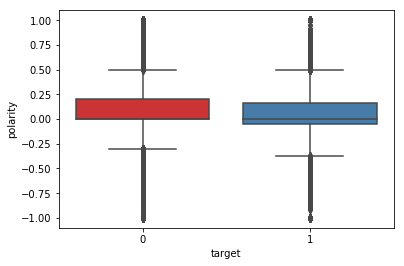

In [5]:
# Grouped boxplot
sns.boxplot(x="target", y="polarity", data=dat, palette="Set1")

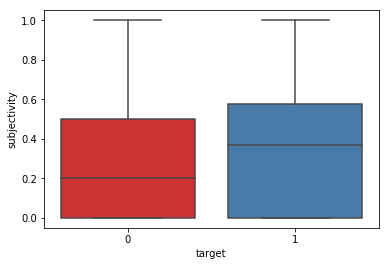

In [6]:
# Grouped boxplot
sns.boxplot(x="target", y="subjectivity", data=dat, palette="Set1")

Polarity is slightly higher for the sincere questions, meaning that they are slightly more positive.
Subjectivity is slightly higher among insincere questions.
These differences aren't large, but they do follow the expected directionality.

TextBlob uses the Pattern library, which in turn uses a corpus based on movie reviews. This may not map very well to the types of language used on Quora. NLTK does include other corpus options, so those could be evaluated.

In addition doing some pre-processing on this text before may improve sentiment scoring.

### Subjective Corpus

In [7]:
import nltk
from nltk.corpus import subjectivity
nltk.download('subjectivity')

[nltk_data] Error loading subjectivity: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


False

In [8]:
print("example subjective sentences")
subj_sents = subjectivity.sents(categories = 'subj')[:5]
subj_sents = [ ' '.join(s) for s in subj_sents ]
print(subj_sents)
print("example objective sentences")
obj_sents = subjectivity.sents(categories = 'obj')[:5]
obj_sents = [ ' '.join(s) for s in obj_sents ]
print(obj_sents)

example subjective sentences
['smart and alert , thirteen conversations about one thing is a small gem .', 'color , musical bounce and warm seas lapping on island shores . and just enough science to send you home thinking .', 'it is not a mass-market entertainment but an uncompromising attempt by one artist to think about another .', 'a light-hearted french film about the spiritual quest of a fashion model seeking peace of mind while in a love affair with a veterinarian who is a non-practicing jew .', 'my wife is an actress has its moments in looking at the comic effects of jealousy . in the end , though , it is only mildly amusing when it could have been so much more .']
example objective sentences
['the movie begins in the past where a young boy named sam attempts to save celebi from a hunter .', 'emerging from the human psyche and showing characteristics of abstract expressionism , minimalism and russian constructivism , graffiti removal has secured its place in the history of moder

### Subjective Questions

In [9]:
print(np.percentile(dat['subjectivity'], [25,75]))

# dat['question_text'][dat['subjectivity']]

[0.  0.5]
